# distrdf001_spark_connection
Configure a Spark connection and fill two histograms distributedly.

This tutorial shows the ingredients needed to setup the connection to a Spark
cluster, namely a SparkConf object holding configuration parameters and a
SparkContext object created with the desired options. After this initial
setup, an RDataFrame with distributed capabilities is created and connected
to the SparkContext instance. Finally, a couple of histograms are drawn from
the created columns in the dataset.




**Author:** Vincenzo Eduardo Padulano  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:08 AM.</small></i>

In [1]:
import pyspark
import ROOT

Point RDataFrame calls to Spark RDataFrame object

In [2]:
RDataFrame = ROOT.RDF.Experimental.Distributed.Spark.RDataFrame

Setup the connection to Spark
First create a dictionary with keys representing Spark specific configuration
parameters. In this tutorial we use the following configuration parameters:

    1. spark.app.name: The name of the Spark application
    2. spark.master: The Spark endpoint responsible for running the
        application. With the syntax "local[2]" we signal Spark we want to run
        locally on the same machine with 2 cores, each running a separate
        process. The default behaviour of a Spark application would run
        locally on the same machine with as many concurrent processes as
        available cores, that could be also written as "local[*]".

If you have access to a remote cluster you should substitute the endpoint URL
of your Spark master in the form "spark://HOST:PORT" in the value of
`spark.master`. Depending on the availability of your cluster you may request
more computing nodes or cores per node with a similar configuration:

    sparkconf = pyspark.SparkConf().setAll(
                    {"spark.master": "spark://HOST:PORT",
                     "spark.executor.instances": <number_of_nodes>,
                     "spark.executor.cores" <cores_per_node>,}.items())

You can find all configuration options and more details in the official Spark
documentation at https://spark.apache.org/docs/latest/configuration.html .

Create a SparkConf object with all the desired Spark configuration parameters

In [3]:
sparkconf = pyspark.SparkConf().setAll(
    {"spark.app.name": "distrdf001_spark_connection",
     "spark.master": "local[2]",
     "spark.driver.memory": "4g"}.items())

Create a SparkContext with the configuration stored in `sparkconf`

In [4]:
sparkcontext = pyspark.SparkContext(conf=sparkconf)

24/04/17 11:08:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


Create an RDataFrame that will use Spark as a backend for computations

In [5]:
df = RDataFrame(1000, sparkcontext=sparkcontext)

Set the random seed and define two columns of the dataset with random numbers.

In [6]:
ROOT.gRandom.SetSeed(1)
df_1 = df.Define("gaus", "gRandom->Gaus(10, 1)").Define("exponential", "gRandom->Exp(10)")

Book an histogram for each column

In [7]:
h_gaus = df_1.Histo1D(("gaus", "Normal distribution", 50, 0, 30), "gaus")
h_exp = df_1.Histo1D(("exponential", "Exponential distribution", 50, 0, 30), "exponential")

Plot the histograms side by side on a canvas

In [8]:
c = ROOT.TCanvas("distrdf001", "distrdf001", 800, 400)
c.Divide(2, 1)
c.cd(1)
h_gaus.DrawCopy()
c.cd(2)
h_exp.DrawCopy()

Save the canvas

In [9]:
c.SaveAs("distrdf001_spark_connection.png")
print("Saved figure to distrdf001_spark_connection.png")

Saved figure to distrdf001_spark_connection.png


Info in <TCanvas::Print>: png file distrdf001_spark_connection.png has been created


Draw all canvases 

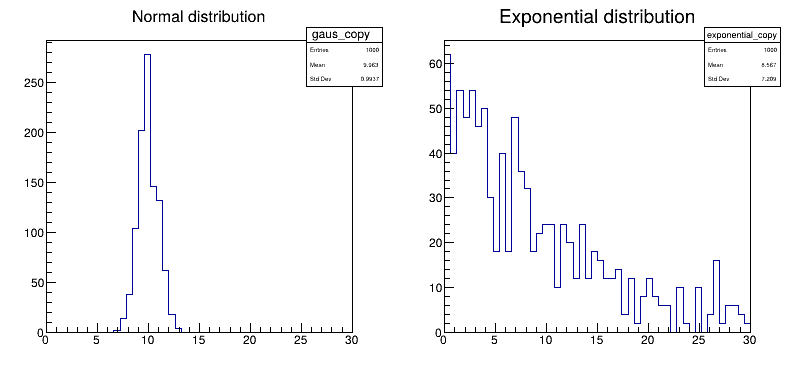

In [10]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()